In [253]:
library('SimDesign')
library('ggplot2')
library('tibble')

## Aluno: Daniel Cunha Oliveira

1. Seja $Y \sim N(\boldsymbol{\mu}, \boldsymbol{\Sigma})$, $i=1,...,n$, onde $\boldsymbol{\Sigma}=(1-\rho)\boldsymbol{I}+\rho\boldsymbol{1}\boldsymbol{1}^{'}$

> a) Simule 100 observações independentes do  vetor  aleatório  $Y_1$ (assuma $p=4$ e adote um  valor  parao  vetor $\mu$ bem  como  para $\rho$, $0<\rho<1$). Padronize  os  dados simulados e calcule o centroide amostral e a matrizes de covariância e correlação amostral, para os dados originais e padronizados. Comente sobre o padrão das matrizes de covariância e correlação obtidas.

In [2]:
p = 4
n = 100

mu = c(0.05, -0.05, 0.03, 0.01)
rho = 0.9
Sigma = (1 - rho) * diag(1, p) + rho * rep(1, p) %*% t(rep(1, p))

In [3]:
qr(Sigma)$rank

[1] 4

Sabemos que uma matriz qualquer $\Sigma_{pxp}$ e' positivo definida se $rank(\Sigma) = p$.

Usando a decomposicao QR e extraindo o posto da matriz obtemos que de fato a matriz $\Sigma$ em questao e' positiva definida.

Este resultado sera importante para calcularmos a padronizacao do vetor amostrado $Y$.

In [4]:
Y = rmvnorm(n, mean=mu, sigma=Sigma) 

Alem disso, sabemos que para uma dada matriz $Y \sim N(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ sua versao padronizada e' dada por

$
\boldsymbol{Y}_{i}^{*} = D_{S_{jj}}^{-1/2}(\boldsymbol{Y}_i - \bar{\boldsymbol{Y}})
$

onde $\boldsymbol{Y}_{i}^{*}$ e $\boldsymbol{Y}_{i}$ sao vetores $px1$ das linhas de $Y$, e as estatisticas $\bar{\boldsymbol{Y}}$ e $S_{jj}$ sao, respectivamente, o vetor de medias (centroides) amostrais e variancia amostral, dado por

$
\bar{\boldsymbol{Y}}_{px1} = [ \bar{Y}_{1} ... \bar{Y}_{p} ]^{'}\\
\bar{Y}_{j} = \frac{1}{n}\sum_{i=1}^{n}Y_{i,j}\\
S_{jj} = \sigma^2_j = \frac{1}{n-1}\sum_{i}^{n}(Y_{ij} - \bar{Y}_{j})^{2}
$

e $D_{S_{jj}}$ e' a diagonal da matriz de covariancia amostral $S_{pxp}$.

In [6]:
# centroide amostral
sample_mean = apply(Y, 2, function(x) mean(x))

# covariancia amostral 
sample_cov = cov(Y)

# padronizacao
padronizacao = function(Y,
                        sample_mean,
                        sample_cov,
                        mahalanobis=FALSE){
    diag_sample_cov = diag(sample_cov)
    
    Y_star = matrix(nrow=dim(Y)[1], ncol=4)
    for (i in 1:dim(Y)[1]){
        Y_i = Y[i,]
        
        if (isFALSE(mahalanobis)){
            factor = -1/2
        }
        else{
            factor = -1
        }
        
        Y_star_i = diag_sample_cov^factor * (Y_i - sample_mean)
        Y_star[i,] = Y_star_i
    }
    return(Y_star)
}

Y_star = padronizacao(Y=Y,
                     sample_mean=sample_mean,
                     sample_cov=sample_cov,
                     mahalanobis=FALSE)

Podemos ainda calcular a matriz de correlacao amostral, que e' dada por

$
R = (r_{ij})
$

onde

$
r_{ij} = \frac{S_{ij}}{(S_{ii}S_{jj})^{1/2}}
$

In [7]:
correl_matrix = function(sample_cov){
    sample_correl = matrix(nrow=dim(sample_cov), ncol=dim(sample_cov)[2])
    for (i in 1:dim(sample_correl)[1]){
        for (j in 1:dim(sample_correl)[2]){
            rij = sample_cov[i,j] / (sample_cov[i,i]*sample_cov[j,j])^(1/2)
            sample_correl[i,j] = rij
        }
    }   
    return(sample_correl)
}

sample_correl = correl_matrix(sample_cov)

Note que, temos as seguintes matrizes:

#### Covariancia amostral

In [8]:
sample_cov

1.434764,1.287553,1.237147,1.282658
1.287553,1.366841,1.215794,1.243103
1.237147,1.215794,1.267041,1.192379
1.282658,1.243103,1.192379,1.320540


#### Correlacao amostral

In [9]:
sample_correl

1.0000000,0.9194238,0.9175627,0.9318474
0.9194238,1.0000000,0.9238590,0.9252778
0.9175627,0.9238590,1.0000000,0.9218142
0.9318474,0.9252778,0.9218142,1.0000000


In [10]:
qr(sample_cov)$rank

[1] 4

In [11]:
qr(sample_correl)$rank

[1] 4

Podemos perceber que ambas as matrizes possuem caracteristicas semelhantes. Primeiro, podemos notar que ambas sao positivas definidas. Alem disso, tanto as covariancias cruzadas quanto as correloes cruzadas sao positivas, em particular temos corrrelacoes acima de 0.8 entre todas as variaveis simuladas.

> b) Considerando os  dados  originais  simulados, bem  como  os  dados  padronizados, há potenciais observações atípicas? Adote $\alpha=0.1$ e $0.05$


Para identificar possiveis observacoes atipicas, utilizarei o seguinte resulado. Sob normalidade dos dados e $(n-p)$ suficientemente grande, temos 

$
(\boldsymbol{Y}_i - \bar{Y})^{'}S^{-1}(\boldsymbol{Y}_i - \bar{Y}) \sim \chi_{p}^2
$

#### $\alpha=0.1$

#### Simulados

In [12]:
alpha = 0.1
cutoff = qchisq(p = 1-alpha, df = dim(Y)[2])

mahalanobis_distance = function(Y,
                                sample_mean,
                                sample_cov){
    mahalanobis_dist_vec = matrix(nrow=dim(Y)[1], ncol=1)
    for (i in 1:dim(Y)[1]){
        mdist = t(Y[i,] - sample_mean) %*% solve(sample_cov) %*% (Y[i,] - sample_mean) 
        mahalanobis_dist_vec[i,] = mdist
    }
    return(mahalanobis_dist_vec)
}

mahalanobist_dist_vec = mahalanobis_distance(Y=Y,
                                             sample_mean=sample_mean,
                                             sample_cov=sample_cov)

Deste modo, as observacoes atipicas utilizando a distancia de Mahalanobis para os dados simulados sao

In [13]:
Y[mahalanobist_dist_vec > cutoff,]

-1.4254512,-2.6136887,-1.69770480,-1.6706896
-0.5105145,-0.9801259,-0.04711025,-1.5075253
-1.8665521,-2.8233827,-2.05160503,-1.5473145
-1.7505317,-1.3804194,-0.63242095,-0.4536359
1.0493812,1.2926956,-0.04048917,0.9556709
0.1950844,1.0285769,-0.19515720,0.4912147
2.5214105,1.3808575,2.04293594,2.0211103
-0.7356956,-1.6384376,-1.83154224,-0.9012898
3.1517647,2.1213652,2.79710364,2.6940910


#### Padronizados

In [14]:
mahalanobist_dist_vec = mahalanobis_distance(Y=Y_star,
                                             sample_mean=apply(Y_star, 2, function(x) mean(x)),
                                             sample_cov=cov(Y_star))

Deste modo, as observacoes atipicas utilizando a distancia de Mahalanobis para os dados simulados sao

In [15]:
Y_star[mahalanobist_dist_vec > cutoff,]

-1.1635698,-2.1021063,-1.4657318098,-1.3680661
-0.3997326,-0.7048477,0.0006435236,-1.2260788
-1.5318240,-2.2814669,-1.7801340115,-1.2607037
-1.4349641,-1.0472365,-0.5193419385,-0.3089734
0.9025501,1.2391972,0.0065256379,0.9174200
0.1893383,1.0132848,-0.1308802351,0.5132454
2.1314774,1.3146060,1.8574242677,1.8445764
-0.5877256,-1.2679308,-1.5846319440,-0.6985264
2.6577301,1.9479951,2.5274209700,2.4302111


#### $\alpha=0.05$

#### Simulados

Mudando o nivel alfa para 0.01, as observacoes atipicas utilizando a distancia de Mahalanobis para os dados simulados sao

In [16]:
alpha = 0.05
cutoff = qchisq(p = 1-alpha, df = dim(Y)[2])

Y[mahalanobist_dist_vec > cutoff,]

-0.5105145,-0.9801259,-0.04711025,-1.5075253
-1.8665521,-2.8233827,-2.05160503,-1.5473145
-1.7505317,-1.3804194,-0.63242095,-0.4536359
1.0493812,1.2926956,-0.04048917,0.9556709
0.1950844,1.0285769,-0.19515720,0.4912147
3.1517647,2.1213652,2.79710364,2.6940910


#### Padronizados

Ja para os dados padronizados sao

In [17]:
Y_star[mahalanobist_dist_vec > cutoff,]

-0.3997326,-0.7048477,0.0006435236,-1.2260788
-1.5318240,-2.2814669,-1.7801340115,-1.2607037
-1.4349641,-1.0472365,-0.5193419385,-0.3089734
0.9025501,1.2391972,0.0065256379,0.9174200
0.1893383,1.0132848,-0.1308802351,0.5132454
2.6577301,1.9479951,2.5274209700,2.4302111


> c) Adote  um  valor  de  referência, $\mu_0$, para  o  vetor $\mu$. Com  base  nos  dados originais simulados, teste a hipótese $H_0:\mu=\mu_0$ (use a estatística de Hotelling na construção desse teste).

Podemos definir uma regiao de confianca para $\boldsymbol{\mu} \in \mathbb{R}^{p}$ dado $Y$ definido anteriormente como

$
R(\boldsymbol{\mu}|Y) = \{ n(\bar{Y} - \boldsymbol{\mu})^{'}S^{-1}(\bar{Y} - \boldsymbol{\mu}) \leq c^2 \}
$

onde

$
c^2 = \frac{(n-1)p}{(n-p)}F_{(p,n-p)}(\alpha)
$

e

$
T^2 = n(\bar{Y} - \boldsymbol{\mu})^{'}S^{-1}(\bar{Y} - \boldsymbol{\mu})
$

e' a estatistica de Hotelling.

Portanto, para determinar se algum ponto $\boldsymbol{\mu}_0$ cai na região $R(\boldsymbol{\mu}|Y)$ basta calcular a distância  generalizada  ao  quadrado e compará-la com o valor crítico  dado em função da distribuição F e do nível de significância $\alpha$, isto é,

$
n(\bar{Y} - \boldsymbol{\mu}_0)^{'}S^{-1}(\bar{Y} - \boldsymbol{\mu}_0) \leq \frac{(n-1)p}{(n-p)}F_{(p,n-p)}(\alpha)
$

Tomando $\boldsymbol{\mu}_0 = \boldsymbol{0}$ e $\alpha=0.05$, temos

In [28]:
hotelling_stats = dim(Y)[1] * t(sample_mean - rep(0, length(sample_mean))) %*% solve(sample_cov) %*% (sample_mean - rep(0, length(sample_mean)))

alpha = 0.05
F_alpha = qf(1-alpha, dim(Y)[1], (dim(Y)[1] - dim(Y)[2]))

In [30]:
hotelling_stats <= F_alpha

FALSE


2. Seja $Y = (Y_1,...,Y_n)^{'}$, $Y_i \in \mathbb{R}^p$, $i=1,..,n$, uma amostra aleatoria $N_p(\mu, \Sigma)$. Usando simulação, adote valores para $n$, $p$, $\mu$, $\Sigma$, com $n>p$, e mostre (por meio de gráficos de probabilidades, isto é, PP-plots) que

> a) $\bar{Y} \sim N_p(\mu, \frac{\Sigma}{n})$, $\bar{Y}  \in \mathbb{R}^p$

> b) $nS \sim W(n-1, \Sigma)$, onde $S=n^{-1}Y^{'}HY$ and $H=\boldsymbol{I}-n^{-1}\boldsymbol{1}\boldsymbol{1}^{'}$

> c) $d_{M,i}^2 = (Y_i - \boldsymbol{\mu})^{'}\boldsymbol{\Sigma}^{-1}(Y_i - \boldsymbol{\mu}) \sim \chi_{p}^{2}$. Avalie também que $\mathbb{E}[d_{M,i}^2] = \frac{2pn}{n-1}$

> d) $d_{M}^2 = n(\bar{Y} - \boldsymbol{\mu})^{'}S_{u}^{-1}(\bar{Y} - \boldsymbol{\mu}) \sim T_{(p,n)}^{2} = \frac{(n-1)}{(n-p)}F_{(p,n-p)}$

> e) $\frac{a^{'}(nS)a}{a^{'}\boldsymbol{\Sigma}a} \sim \chi_{n-1}^2$, $a \in \mathbb{R}^p$

In [182]:
qqplot_any_theoretical = function(x, y, include_in_title, theoretical_dist_name){
  sx = sort(x)
  sy = sort(y)
 
  pp = ppoints(length(sx))
  qx = quantile(sx, pp)
  qy = quantile(sy, pp)
 
  d = tibble(
    sample = qx,
    theoretical = qy
  )
  plt = ggplot(d) +
    geom_point(aes(x = theoretical, y = sample)) +
    labs(
      x = paste0("analytical quantiles: ", theoretical_dist_name, " distribution"),
      y = "empirical quantiles"
    ) +
    ggtitle(paste0(theoretical_dist_name, ' qqplot: ', include_in_title))
 
  return(plt)
}

In [ ]:
H = n^(-1) * 

Tomemos o seguinte setup para a simulacao

In [248]:
p = 4
n = 100

mu = c(0.05, -0.05, 0.03, 0.01)
rho = 0.9
Sigma = (1 - rho) * diag(1, p) + rho * rep(1, p) %*% t(rep(1, p))
a = rep(1, p)

Y_bar = d2mi = d2m = nS = E = matrix(nrow=n, ncol=1)
for (i in 1:n){
    Y = rmvnorm(n, mean=mu, sigma=Sigma) 
    sample_mean = apply(Y, 2, function(x) mean(x))
    sample_cov = cov(Y)
    Y_bar[i,] = sum(sample_mean)
    d2mi[i,] = t(Y[1,] - sample_mean) %*% solve(sample_cov) %*% (Y[1,] - sample_mean)
    d2m[i,] = t(sample_mean - mu) %*% solve(sample_cov) %*% (sample_mean - mu)  
    nS[i,] = (t(a) %*% solve(sample_cov) %*% a) / t(a) %*% Sigma %*% a
    E[i,] = (t(a) %*% sample_cov %*% a) / t(a) %*% Sigma %*% a
}

#### a) $\bar{Y} \sim N(\mu, \frac{\Sigma}{n})$, $\bar{Y}  \in \mathbb{R}^p$


In [247]:
media_analitica = rep(1, p) %*% mu
variancia_analitica = t(rep(1, p)) %*% solve(Sigma) %*% rep(1, p)

Y_bar_anaitico = rnorm(n=n, mean=media_analitica, sd=variancia_analitica/n)

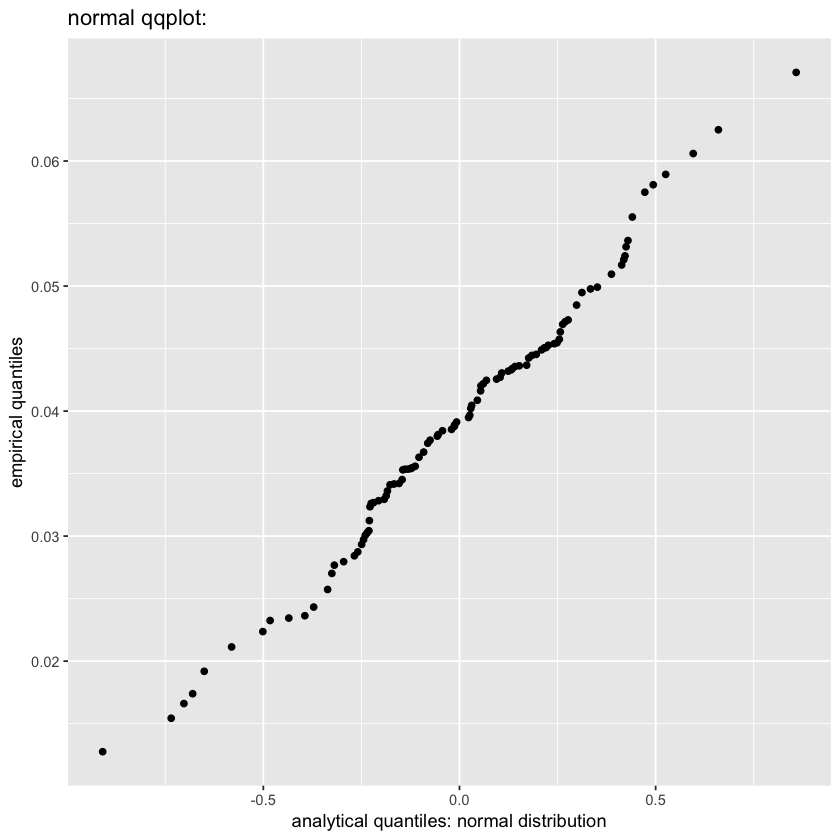

In [186]:
qqplot_any_theoretical(x=Y_bar_anaitico,
                       y=Y_bar,
                       include_in_title="",
                       theoretical_dist_name="normal")

#### b) $nS \sim W(n-1, \Sigma)$, where $S=n^{-1}Y^{'}HY$ and $H=\boldsymbol{I}-n^{-1}\boldsymbol{1}\boldsymbol{1}^{'}$

Usando o teorema que relaciona a distribuicao Wischart com a Qui-quadrado da pagina 67 do livro do Mardi, temos que

In [249]:
nS_analitica = rWishart(n=n, df=n-1, Sigma=t(a) %*% Sigma %*% a)

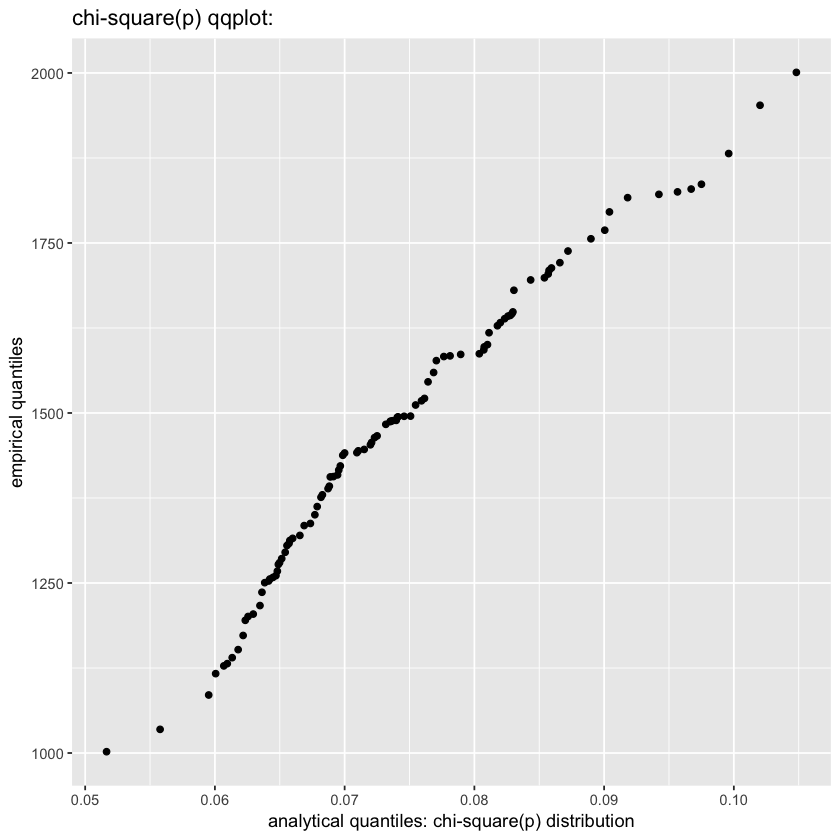

In [251]:
qqplot_any_theoretical(x=nS_analitica,
                       y=nS,
                       include_in_title="",
                       theoretical_dist_name="chi-square(p)")

#### c) $d_{M,i}^2 = (Y_i - \boldsymbol{\mu})^{'}\boldsymbol{\Sigma}^{-1}(Y_i - \boldsymbol{\mu}) \sim \chi_{p}^{2}$. Avalie também que $\mathbb{E}[d_{M,i}^2] = \frac{2pn}{n-1} (??)$

In [189]:
d2mi_analitica = rchisq(n=n, df=p)

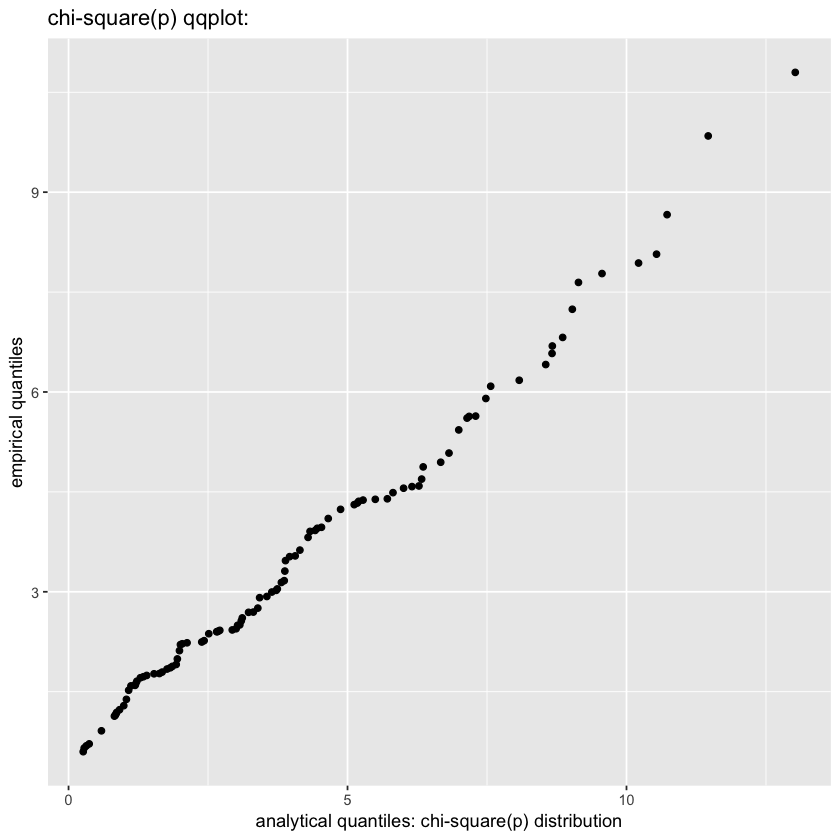

In [240]:
qqplot_any_theoretical(x=d2mi_analitica,
                       y=d2mi,
                       include_in_title="",
                       theoretical_dist_name="chi-square(p)")

In [191]:
mean(d2mi_analitica)

[1] 3.563542

In [192]:
mean(d2mi)

[1] 3.68695

#### d) $d_{M}^2 = n(\bar{Y} - \boldsymbol{\mu})^{'}S_{u}^{-1}(\bar{Y} - \boldsymbol{\mu}) \sim T_{(p,n)}^{2} = \frac{(pn)}{(n-p+1)}F_{(p,n-p+1)}$ (pagina 74 do Mardia)


In [229]:
d2m_analitica = p*n/(n-p+1) * rf(n=n, df1=p, df2=n-p+1)

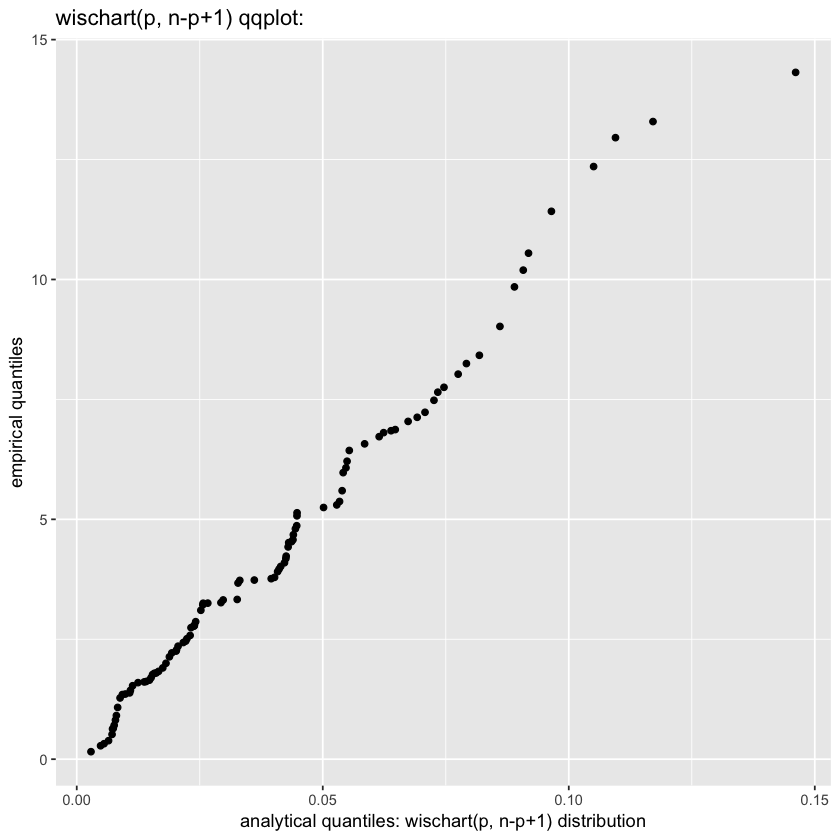

In [239]:
qqplot_any_theoretical(x=d2m_analitica,
                       y=d2m,
                       include_in_title="",
                       theoretical_dist_name="wischart(p, n-p+1)")

#### e) $\frac{a^{'}(nS)a}{a^{'}\boldsymbol{\Sigma}a} \sim \chi_{n-1}^2$, $a \in \mathbb{R}^p$

In [236]:
E_analitica = rchisq(n=n, df=n-1)

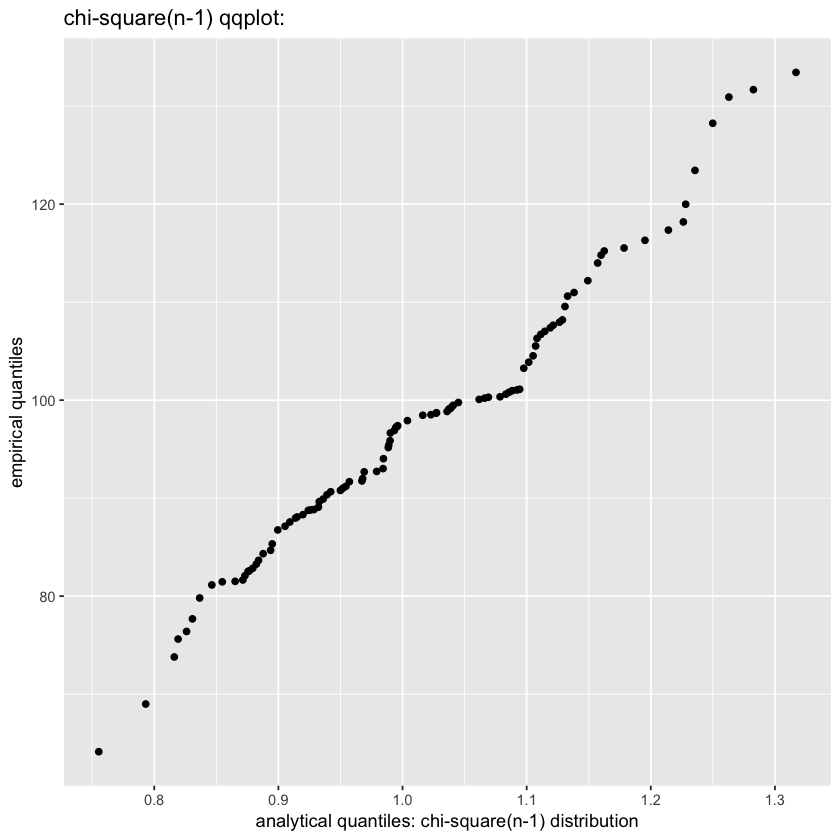

In [238]:
qqplot_any_theoretical(x=E_analitica,
                       y=E,
                       include_in_title="",
                       theoretical_dist_name="chi-square(n-1)")